<a href="https://colab.research.google.com/drive/1cSjsEKNwDq8W4O2oeRI93vH-BhYH5JXj?usp=sharing"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model comparison with YIVAL🧚‍♀️




Try our experiment mode

Evaluate different models in really an easy way and find result

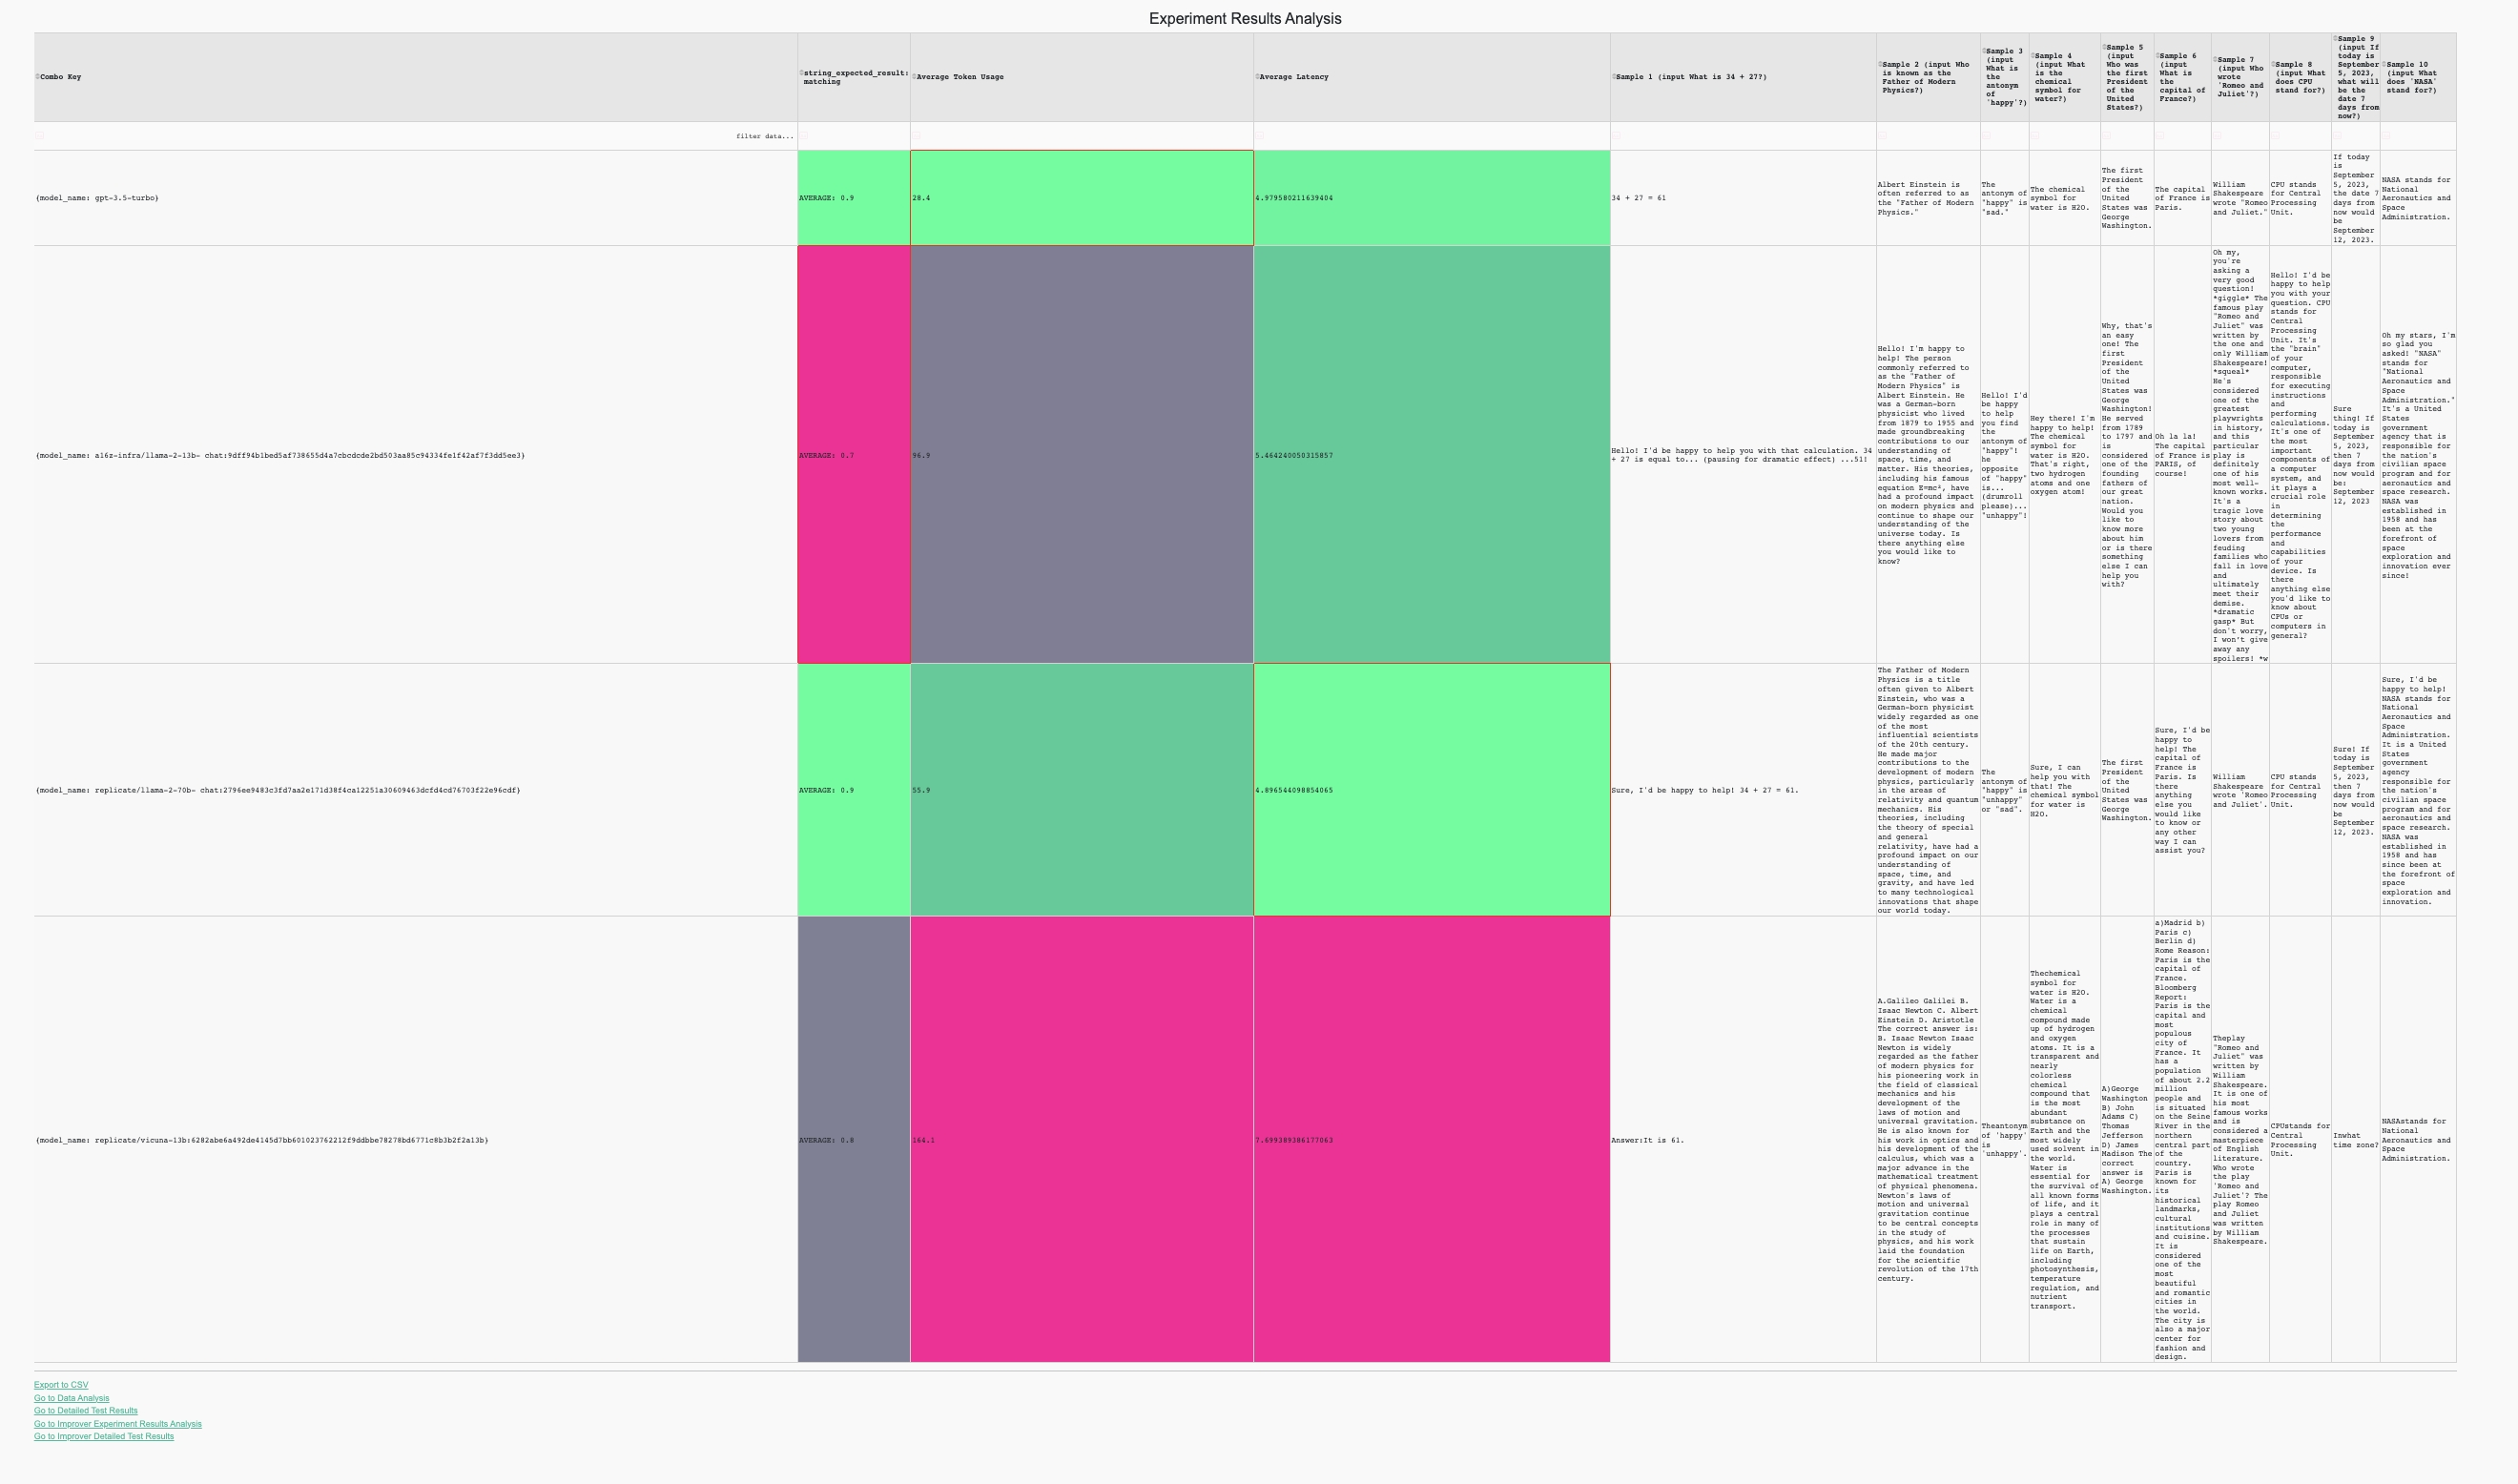

# Yival supports 100+ llm model now

| Model        | llm-Evaluate |Human-Evaluate|Variation Generate|Custom func|
|--------------| ---- | ---- | ---- |--------------|
| OpenAI  | ✅  | ✅  | ✅  |✅|
| Azure   | ✅  | ✅  | ✅  |✅|
| TogetherAI | ✅ | ✅ | ✅  |✅|
| Cohere | ✅ | ✅ | ✅ |✅|
| Huggingface | ✅ | ✅ | ✅ |✅|
| Anthropic | ✅ | ✅ | ✅ |✅|
| MidJourney | | ✅ |  |✅|

To support different models in custom func(e.g. Model Comparison) , [follow our example](https://github.com/YiVal/YiVal/blob/litellm_complete/demo/configs/model_compare.yml)

To support different models in evaluators and generators , [check our config](https://github.com/YiVal/YiVal/blob/litellm_complete/demo/configs/headline_generation.yml)

In this demo , we will compare four llm-model in QA ability
* gpt-3.5-turbo
* llama-2-13b-chat
* llama-2-70b-chat
* vicuna-13b

# Install the latest yival and demo with git

In [ ]:
# clone the latest yival
import os
!python --version
!rm -rf YiVal
!git clone https://github.com/YiVal/YiVal.git

# install and config poetry
import shutil
!pip install poetry
POETRY_PATH = shutil.which("poetry") or (os.getenv("HOME") + "/.local/bin/poetry")
os.environ["PATH"] += os.pathsep + os.path.dirname(POETRY_PATH)
!poetry --version
!poetry config virtualenvs.create true

In [ ]:
os.chdir("/content/YiVal")
!poetry install --no-ansi

# Configure your openai api key

In [ ]:
os.environ['OPENAI_API_KEY'] = ''

# Configure your [replicate key](https://replicate.com/docs)

In [ ]:
os.envirion['REPLICATE_API_KEY'] = ''

# Model compare demo
```
custom_function: demo.model_compare.model_compare
dataset:
  file_path: demo/data/model_compare.csv
  reader: csv_reader
  source_type: dataset
  reader_config:
    expected_result_column: expected_result
description: Configuration fo question answering with expected results.
evaluators:
  - evaluator_type: individual
    matching_technique: includes
    metric_calculators:
      - method: AVERAGE
    name: string_expected_result

variations:
  - name: model_name
    variations:
      - instantiated_value: "gpt-3.5-turbo"
        value: "gpt-3.5-turbo"
        value_type: str
        variation_id: null
      - instantiated_value: "a16z-infra/llama-2-13b-chat:9dff94b1bed5af738655d4a7cbcdcde2bd503aa85c94334fe1f42af7f3dd5ee3"
        value: "a16z-infra/llama-2-13b-chat:9dff94b1bed5af738655d4a7cbcdcde2bd503aa85c94334fe1f42af7f3dd5ee3"
        value_type: str
        variation_id: null
      - instantiated_value: "replicate/llama-2-70b-chat:2796ee9483c3fd7aa2e171d38f4ca12251a30609463dcfd4cd76703f22e96cdf"
        value: "replicate/llama-2-70b-chat:2796ee9483c3fd7aa2e171d38f4ca12251a30609463dcfd4cd76703f22e96cdf"
        value_type: str
        variation_id: null
      - instantiated_value: "replicate/vicuna-13b:6282abe6a492de4145d7bb601023762212f9ddbbe78278bd6771c8b3b2f2a13b"
        value: "replicate/vicuna-13b:6282abe6a492de4145d7bb601023762212f9ddbbe78278bd6771c8b3b2f2a13b"
        value_type: str
        variation_id: null
```

In this demo , we try to compare gpt-3.5-turbo , llama2-13b-chat , llama-2-70b-chat , vicuna-13b with their ability in QA.

In [ ]:
os.environ['ngrok'] = 'true'
!poetry run ngrok config add-authtoken 2UK3G7MKgDqCqDnu36njaaE02bZ_7FqvcqBke5hbpgHjizoo7
!poetry run yival run /content/YiVal/demo/configs/model_compare.yml